In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt


**READING THE IMAGE**

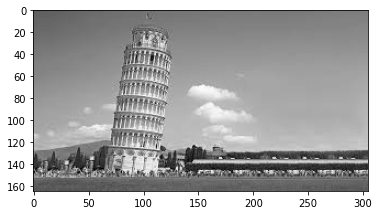

In [12]:
# Read image as grayscale
img = cv2.imread('pisa.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()


In [4]:
print(img.shape)
# Get image height and width
hgt=img.shape[0]
wdt=img.shape[1]

(165, 305)


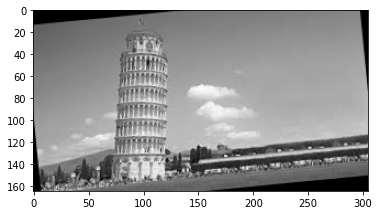

In [5]:
rotated = cv2.warpAffine(img, cv2.getRotationMatrix2D((wdt/2,hgt/2),5.5,1), (wdt,hgt))
plt.imshow(rotated, cmap='gray')
plt.show()

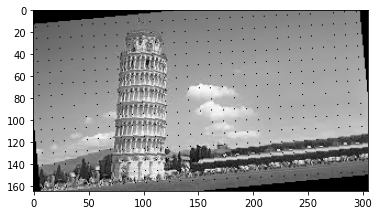

In [13]:
def rotate_image(image, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    cos, sin = np.cos(np.deg2rad(angle)), np.sin(np.deg2rad(angle))
    rotation_matrix = np.array([[cos, -sin], [sin, cos]])

    coords = np.array([(x, y) for y, x in np.ndindex(h, w)])
    rotated_coords = np.dot(rotation_matrix, (coords - center).T).T + center

    rotated_coords = rotated_coords.astype(int)
    rotated_image = np.zeros_like(image)
    for y, x in np.ndindex(h, w):
        x_rot, y_rot = rotated_coords[y * w + x]
        if 0 <= y_rot < h and 0 <= x_rot < w:
            rotated_image[y_rot, x_rot] = image[y, x]
    return rotated_image

#rotate the image by 5.5 degrees
rotated = rotate_image(img, -5.5)
plt.imshow(rotated, cmap='gray')
plt.show()



In [5]:
 

pointsList = []
img = cv2.imread('pisa.jpg')

def mousePoints(event,x,y,flags,params):
    if event == cv2.EVENT_LBUTTONDOWN:
        size = len(pointsList)
        if size != 0 and size % 3 != 0:
            cv2.line(img,tuple(pointsList[round((size-1)/3)*3]),(x,y),(0,0,255),2)
        cv2.circle(img,(x,y),5,(0,0,255),cv2.FILLED)
        pointsList.append([x,y])

def gradient(pt1,pt2):
    if pt2[0] - pt1[0] == 0:
        return None
    return (pt2[1]-pt1[1])/(pt2[0]-pt1[0])

def getAngle(pointsList):
    pt1, pt2, pt3 = pointsList[-3:]
    m1 = gradient(pt1,pt2)
    m2 = gradient(pt1,pt3)
    if m1 is None or m2 is None:
        return
    angR = math.atan((m2-m1)/(1+(m2*m1)))
    angD = round(math.degrees(angR))
    cv2.putText(img,str(angD),(pt1[0]-40,pt1[1]-20),cv2.FONT_HERSHEY_COMPLEX,
                1.5,(0,0,255),2)

cv2.imshow("Image",img)
cv2.setMouseCallback("Image",mousePoints)
key = cv2.waitKey(0) & 0xFF
while key != ord('q'):
    if len(pointsList) % 3 == 0 and len(pointsList) != 0:
        getAngle(pointsList)
    cv2.imshow("Image",img)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        pointsList = []
        img = cv2.imread('pisa.jpg')
        cv2.imshow("Image",img)
        key = cv2.waitKey(0) & 0xFF

cv2.destroyAllWindows()